# The Sparks Foundation - Machine Learning/ Data Science Tasks
***
- Created by Aparajita Das
***
#### Q1. (To Explore Supervised Machine Learning)

In this regression task we will predict the percentage of marks that a student is expected to
score based upon the number of hours they studied. This is a simple linear regression task as it
involves just two variables.

### Task 1 : Importing Libraries and Loading Dataset
***

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import yellowbrick as yb
plt.style.use('ggplot')

C:\Users\Aparajita Das\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
t1 = pd.read_csv("t1.csv")

In [3]:
t1.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


***
### Task 2 : Exploratory Data Analysis
***

In [4]:
t1.shape

(25, 2)

In [5]:
t1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
t1.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
X = t1.iloc[:, :-1].values
y= t1.iloc[:, 1].values

In [8]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state= 0)

#feature scaling
#from sklearn.preprocessing import StandardScaler
#sc_X = StandardScaler()
#X_train = sc_X.fit_transform(X_train)
#X_test = sc_X.transform(X_test)

Text(0.5, 1.0, 'Distribution of Scores')

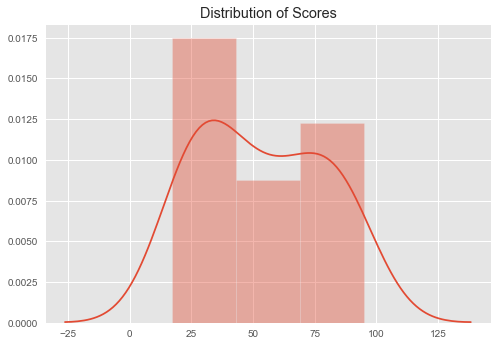

In [9]:
sns.distplot(y_train, kde=True)
plt.title('Distribution of Scores')

Text(0.5, 1.0, 'Hours VS Scores')

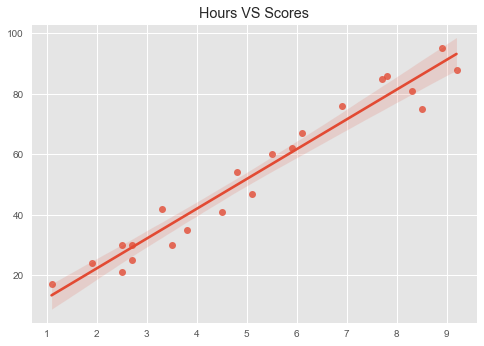

In [10]:
sns.regplot(X_train, y_train)
plt.title('Hours VS Scores')

***
### Task 3 : Model Development
***

In [11]:
#fitting simple linear regression to the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
#predicting the test set results
y_pred = regressor.predict(X_test)

# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df.head(5)

,Actual,Predicted
0,20,17.302210
1,27,34.055294
2,69,75.445267


***
### Task 4 : Visualizing the Results
***

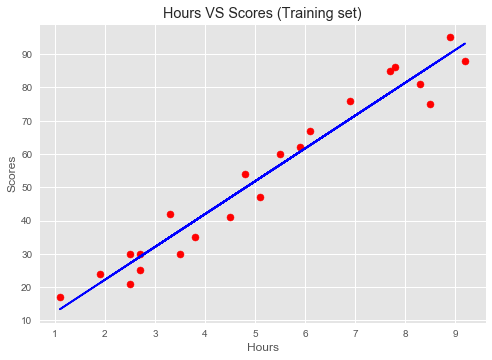

In [13]:
#visualising the training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train,  regressor.predict(X_train), color= 'blue')
plt.title('Hours VS Scores (Training set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

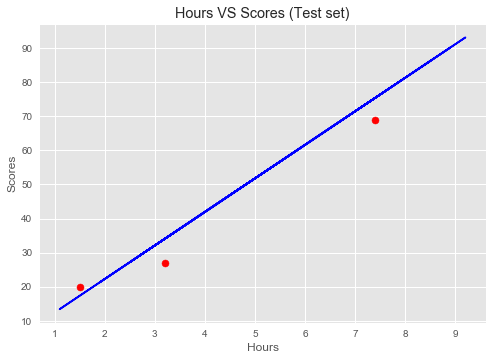

In [14]:
#visualising the test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train,  regressor.predict(X_train), color= 'blue')
plt.title('Hours VS Scores (Test set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

***
### Task 5 : Model Evaluation
***

In [15]:
k = X_test.shape[1]
n = len(X_test)
n

3

In [16]:
from sklearn.metrics import r2_score
from math import sqrt

r2 = r2_score(y_test, y_pred)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('R2 =', r2, '\nAdjusted R2 =', adj_r2) 

R2 = 0.9298077534821835 
Adjusted R2 = 0.859615506964367


***
### Task 6 : Predicting Future Data
***

In [17]:
Hours = 9.25
my_pred = regressor.predict([[Hours]])

print('Hours =', Hours, '\nPrediction =', my_pred) 

Hours = 9.25 
Prediction = [93.67656425]
